# K-means Clustering


---

## Before Class
This weeks class we will be implementing the K-means clustering algorithm. 

Prior to class, please do the following:
1. Review the K-means algorithm


---
## Learning Objectives

1. Implement K-means
* Understanding of clustering
* manipulation of arrays and lists in python


Implement K-means clustering to partion a set of 'points' into K distinct clusters.

```
k_means_cluster(points, K):
    Initialization: Select K random "centroids" from points
    Assignment: Each point is assigned to nearest centroid cluster using Euclidean distance
    Update: Calculate the cluster mean to be new centroids
    Repeat Assignment and Update to convergence of centroids at tolerance level 1e-5
```

<center><img src="figures/kmeans.gif"></center>

For this assignment, we have provided a dataclass Point that contains the information for each point in the 2D space where we will be clustering. This class is defined below and includes a description of how to use the class. A demo of the clustering is shown above where we have plotted the steps of k-means for the demo data provided.

For this question you will implement all of k-means in the `k_means_cluster` function defined below. This function includes sub functions that you will also implement for `select_initial_centroids`, `euclidean_distance`, `assign_points`, and `define_new_centroids` that are all also defined below. These sub-functions should help you break apart the parts of the algorithm described above. I have provided a `check_converge` function that you can use to know when to stop the algorithm.

In [25]:
import random
import math
from dataclasses import dataclass
import pandas as pd
import numpy as np
from copy import deepcopy

@dataclass
class Point:
    ''' A dataclass provided to store points and their cluster
    Created as:
        new_point = Point(x_position=x, y_position=y, cluster=cluster)
    Values can be addressed as:
        new_point.x_position = 0
        print(new_point.y_position)
    '''
    x_position: float
    y_position: float
    cluster: int = None
    
def k_means_cluster(points, k, seed=None, tolerance=1e-5):
    ''' Algorithm for k-means clustering of point objects
    
    Args:
        points (list of Point) : points in our 2D space to be clustered
        k (int) : number of clusters to generate len(points) >= k >=1 
        seed (int) : seed for random number generator
        tolerance (float) : Tolerance for checking for convergence of centroid positions
        
    Returns:
        points (list of Point) : points in our 2D space with Point.cluster assigned to appropriate cluster
        centroids (list of Point) : centroid locations in order of cluster number
    
    '''
    def check_converge(new_centroids, old_centroids, tolerance):
        ''' Determines if centroids have reached convergence
        
        Args: 
            new_centroids (list of Point): list of new centroids
            old_centroids (list of Point): list of old centroids
            tolerance (float): tolerance for the comparison
            
        Returns:
            bool: new_centroids and old_centroids within tolerance
        '''
        if np.allclose(pd.Series([x.x_position for x in new_centroids]), pd.Series([x.x_position for x in old_centroids]), atol=tolerance):
            if np.allclose(pd.Series([x.y_position for x in new_centroids]), pd.Series([x.y_position for x in old_centroids]), atol=tolerance):
                return True
        return False

    def select_initial_centroids(points, k, seed=seed):
        ''' Selects k random unique points from list of Point
        This is Initialization step of k-means
        
        Args:
            points (list of Point): list of points for clustering
            k (int): number of clusters
            seed (int): seed for random number generator
            
        Returns:
            centroids (list of Point): random centroids for starting position
        '''
        centroids = []  
        #Randomly select k centroids
        random.seed(seed)
        centroids = random.sample(points, k)
        return centroids
    
    def euclidean_distance(point1, point2):
        ''' Calculates Euclidean distance between two Points
        
        Args:
            point1 (Point): first point for comparison
            point2 (Point): second point for comparison
            
        Returns:
            distance (float): Euclidean distance between points
        '''
        return math.sqrt((point1.x_position - point2.x_position)**2 + (point1.y_position - point2.y_position)**2)
    
    def assign_points(points, centroids):
        ''' Assign points to a cluster
        This is Assignment step of k-means
        
        Args: 
            points (list of Point): list of points for clustering
            centroids (list of Point): current cluster centroids
            
        Returns:
            None but updates points list to assign clusters
        '''
        for i, point in enumerate(points):
            max_dist = float('Inf')
            for j, point2 in enumerate(centroids):
                distance = euclidean_distance(point, point2)
                if distance < max_dist:
                    max_dist = distance
                    point.cluster = j
        pass
            
    def define_new_centroids(points, k):
        ''' Create new centroids based on points clusters
        This is Update step of k-means
        
        Args:
            points (list of Point): list of points for clustering
            k (int): number of clusters
        
        Returns:
            new_centroids (list of Point): calculated new centroids of each cluster
        '''
        new_centroids = []
        for j in range(k):
            items = [item for item in points if item.cluster == j]
            x_sum = sum([item.x_position for item in items])
            y_sum = sum([item.y_position for item in items])
            new_centroids.append(Point(x_position = x_sum/len(items), y_position = y_sum/len(items)))
        return new_centroids
        
        
    # Check valid k
    assert k > 0, "k must be greater than 0."
    assert k <= len(points), "k must be less than or equal to the number of points."
    
    # First iteration select random centroids:
    centroids = select_initial_centroids(points, k)
    
    # Now until convergence we do this:
    converged = False
    iteration_count = 1
    while not converged:
        old_centroids = deepcopy(centroids)
        
        # Assign points
        assign_points(points, centroids)
        
        centroids = define_new_centroids(points, k)
        iteration_count += 1

        if check_converge(centroids, old_centroids, tolerance):
            converged = True
    
    return points, centroids

In [27]:
# This is demo code to initialize a set of point objects similar to that in the slides from class
demo_points_x = [3,4,4,5,5,6,6,7,7,5,6,7,8,8,8,9,11,12,13,13,17,17,18,18,18,19,21]
demo_points_y = [7,5,3,6,7,5,7,6,5,14,15,13,16,13,12,14,13,15,15,13,7,9,5,7,9,6,8]
list_of_points = []
for x,y, in zip(demo_points_x, demo_points_y):
    list_of_points.append(Point(x_position=x, y_position=y))

[Point(x_position=9.090909090909092, y_position=13.909090909090908, cluster=None), Point(x_position=5.222222222222222, y_position=5.666666666666667, cluster=None), Point(x_position=18.285714285714285, y_position=7.285714285714286, cluster=None)]


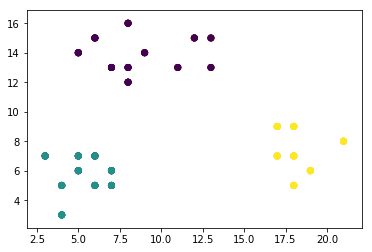

In [33]:
points, centroids = k_means_cluster(list_of_points, 3, seed=2)
print(centroids)
